In [220]:
from pandas_datareader import data as web
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import csv
from matplotlib import pyplot as plt
import random

In [221]:
# Stock market indices
# assets = ['^GSPC', '^DJI', '^IXIC', '^RUT']

assets = ['SPY', 'DIA', 'ONEQ', 'IWM']

asset_list = assets

In [222]:
# Iterate through index list, check if we already have the data (load it) or go get it from Yahoo! (save it)
# Make a dictionary of dataframes containing all the data

start_date = '01-01-2005'
# stop_date = '05-01-2018' # First version of paper
stop_date = '12-20-2019' # Final version of paper
directory = '../../../data/yahoo_data'

# If the 'directory' doesn't exist, create it
if os.path.isdir(directory) == False:
    os.mkdir(directory)

asset_dict = {}

for asset in asset_list:
    pathname = directory + '/' + asset + '_' + start_date + '.csv'
    if os.path.isfile(pathname) == True:
        print('Loading from file: ', pathname)        
        df = pd.read_csv(pathname, index_col='Date')
    else:
        print('Downloading from Yahoo! - ', asset)
        df = web.DataReader(asset, data_source='yahoo', start=start_date, end=stop_date)
        df.to_csv(pathname)    

    # Just before we put it in the dictionary, copy the index to a Date field and make a new index which enumerates
    # all the entries.
    df.insert(0, 'Date', df.index)
    df.index = np.arange(df.shape[0])
    df['Date']=pd.to_datetime(df['Date'], format='%Y/%m/%d')
    
    asset_dict[asset] = df 

Loading from file:  ../../../data/yahoo_data/SPY_01-01-2005.csv
Loading from file:  ../../../data/yahoo_data/DIA_01-01-2005.csv
Loading from file:  ../../../data/yahoo_data/ONEQ_01-01-2005.csv
Loading from file:  ../../../data/yahoo_data/IWM_01-01-2005.csv


In [223]:
for asset in asset_list:
    display(asset_dict[asset].head(5))
    print(asset, asset_dict[asset].describe())

Date        High         Low        Open       Close      Volume  \
0 2005-01-03  121.760002  119.900002  121.559998  120.300003  55748000.0   
1 2005-01-04  120.540001  118.440002  120.459999  118.830002  69167600.0   
2 2005-01-05  119.250000  118.000000  118.739998  118.010002  65667300.0   
3 2005-01-06  119.150002  118.260002  118.440002  118.610001  47814700.0   
4 2005-01-07  119.230003  118.129997  118.970001  118.440002  55847700.0   

   Adj Close  
0  87.421600  
1  86.353340  
2  85.757454  
3  86.193451  
4  86.069946

SPY               High          Low         Open        Close        Volume  \
count  3769.000000  3769.000000  3769.000000  3769.000000  3.769000e+03   
mean    172.583473   170.706896   171.694903   171.704057  1.404362e+08   
std      59.937619    59.747708    59.858254    59.865418  9.845221e+07   
min      70.000000    67.099998    67.949997    68.110001  1.527000e+07   
25%     126.690002   125.150002   125.980003   125.860001  7.227020e+07   
50%     147.809998   146.360001   146.970001   147.169998  1.103898e+08   
75%     210.860001   209.240005   209.990005   210.130005  1.764840e+08   
max     321.970001   319.529999   320.459991   320.899994  8.710263e+08   

         Adj Close  
count  3769.000000  
mean    149.234895  
std      64.939858  
min      53.503864  
25%      96.708336  
50%     117.523109  
75%     189.141800  
max     314.850250  


Date        High         Low        Open       Close      Volume  \
0 2005-01-03  108.589996  106.930000  108.150002  107.320000  11691300.0   
1 2005-01-04  107.599998  105.889999  107.500000  106.300003  10628300.0   
2 2005-01-05  106.779999  105.709999  106.300003  105.709999  10885300.0   
3 2005-01-06  106.660004  105.830002  106.129997  106.040001   8238900.0   
4 2005-01-07  106.500000  105.629997  106.330002  105.839996   8555700.0   

   Adj Close  
0  73.506165  
1  72.807533  
2  72.403397  
3  72.629478  
4  72.492485

DIA               High          Low         Open        Close        Volume  \
count  3769.000000  3769.000000  3769.000000  3769.000000  3.769000e+03   
mean    154.668084   153.099307   153.921106   153.929337  8.493288e+06   
std      52.923150    52.668611    52.815204    52.810643  7.826712e+06   
min      67.169998    64.779999    65.510002    65.440002  8.119000e+05   
25%     112.660004   111.260002   111.959999   112.070000  3.995400e+06   
50%     134.429993   132.889999   133.690002   133.559998  6.176900e+06   
75%     180.250000   178.880005   179.669998   179.759995  9.658700e+06   
max     285.059998   284.320007   284.760010   284.459991  9.169520e+07   

         Adj Close  
count  3769.000000  
mean    130.966236  
std      58.481885  
min      49.443554  
25%      84.213493  
50%     106.576218  
75%     159.299820  
max     278.288849  


Date       High        Low       Open      Close    Volume  Adj Close
0 2005-01-03  86.449997  84.730003  86.250000  84.910004   40300.0  73.121384
1 2005-01-04  85.489998  82.839996  85.489998  83.250000   68800.0  71.691879
2 2005-01-05  83.480003  82.500000  83.339996  82.540001  112800.0  71.080414
3 2005-01-06  83.019997  82.339996  82.419998  82.449997   38300.0  71.002930
4 2005-01-07  82.930000  81.870003  82.400002  82.400002   38300.0  70.959862

ONEQ               High          Low         Open        Close        Volume  \
count  3769.000000  3769.000000  3769.000000  3769.000000  3.769000e+03   
mean    153.640889   151.778374   152.873553   152.756965  4.735734e+04   
std      76.838863    76.194006    76.577235    76.554236  1.424147e+05   
min      51.750000    49.500000    50.230000    49.799999  8.000000e+02   
25%      91.860001    90.570000    91.250000    91.160004  1.020000e+04   
50%     117.959999   116.370003   117.379997   117.209999  1.940000e+04   
75%     199.490005   197.429993   198.559998   198.490005  3.510000e+04   
max     350.140015   348.339996   348.859985   350.140015  2.490400e+06   

         Adj Close  
count  3769.000000  
mean    142.107899  
std      76.852509  
min      44.096684  
25%      80.312309  
50%     106.465088  
75%     186.641846  
max     344.424591  


Date       High        Low       Open      Close      Volume  \
0 2005-01-03  65.209999  63.570000  65.095001  63.910000  16062600.0   
1 2005-01-04  64.084999  62.430000  64.035004  62.540001  27450000.0   
2 2005-01-05  62.639999  61.290001  62.470001  61.290001  29884200.0   
3 2005-01-06  62.200001  61.224998  61.669998  61.615002  23061200.0   
4 2005-01-07  61.950001  60.895000  61.755001  60.930000  20906200.0   

   Adj Close  
0  51.335308  
1  50.234875  
2  49.230827  
3  49.491879  
4  48.941639

IWM               High          Low         Open        Close        Volume  \
count  3769.000000  3769.000000  3769.000000  3769.000000  3.769000e+03   
mean     98.160443    96.655435    97.457275    97.450405  4.656681e+07   
std      33.938312    33.785986    33.873087    33.865868  3.103183e+07   
min      35.639999    34.259998    34.730000    34.389999  1.200000e+03   
25%      71.160004    69.760002    70.500000    70.529999  2.505870e+07   
50%      83.529999    82.430000    82.919998    82.949997  3.832170e+07   
75%     122.160004   120.610001   121.459999   121.529999  5.901580e+07   
max     173.389999   171.949997   172.789993   173.020004  3.551170e+08   

         Adj Close  
count  3769.000000  
mean     88.227562  
std      35.807308  
min      29.028275  
25%      58.964550  
50%      72.305145  
75%     113.105125  
max     167.320114  


In [224]:
# Make a synthetic data set of the same length and input features as the asset(s) collected from Yahoo!

# Use first asset in list of assets as the source
syn_length = len(asset_dict[asset_list[0]])
syn_df = asset_dict[asset_list[0]].copy()

# We'll generate the Adj Close price as the primary (since this is the sequnce of labels we are training on)
# The relationship of the other features to the Adj Close will be as follows:
# Close = close_scale * Adj Close
# Open = previous day's Close
# Low = Open
# High = Close
# Volume = 0

adj_close_start = 85
price_slope = 0.01
close_scale = 1.4

# Add cyclical trends (magnitude, days for full cycle)
trend_list = []
#trend_list.append((adj_close_start/2, 1))
#trend_list.append((adj_close_start/4, 2))
trend_list.append((adj_close_start/8, 20))

for i in range(syn_length-1):
    mag = adj_close_start + (i * price_slope)
    for trend in trend_list:
        mag += (trend[0] * np.sin(6.28 * i / trend[1]))
#    print(i, mag)

    syn_df['Adj Close'].loc[i] = mag
    syn_df['Close'].loc[i] = mag * close_scale
    
    # Today's open is yesterday's close
    if i > 0:
        syn_df['Open'].loc[i] = syn_df['Close'].loc[i-1]
    else:
        syn_df['Open'].loc[i] = syn_df['Close'].loc[i]
        
    syn_df['Low'].loc[i] = syn_df['Open'].loc[i]
    syn_df['High'].loc[i] = syn_df['Close'].loc[i]
    
display(syn_df.head(5))
print(syn_df.describe())    

asset_dict['SYN'] = syn_df 
asset_list.append('SYN')


C:\Users\q2\Anaconda3\envs\mlp\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date        High         Low        Open       Close      Volume  \
0 2005-01-03  119.000000  119.000000  119.000000  119.000000  55748000.0   
1 2005-01-04  123.608375  119.000000  119.000000  123.608375  69167600.0   
2 2005-01-05  127.767472  123.608375  123.608375  127.767472  65667300.0   
3 2005-01-06  131.071949  127.767472  127.767472  131.071949  47814700.0   
4 2005-01-07  133.200034  131.071949  131.071949  133.200034  55847700.0   

   Adj Close  
0  85.000000  
1  88.291696  
2  91.262480  
3  93.622821  
4  95.142882

              High          Low         Open        Close        Volume  \
count  3769.000000  3769.000000  3769.000000  3769.000000  3.769000e+03   
mean    145.430648   145.412026   145.412310   145.430319  1.404362e+08   
std      18.715572    18.702078    18.704727    18.712478  9.845221e+07   
min     104.335042   104.335042   104.335042   104.335042  1.527000e+07   
25%     131.997288   131.957899   131.957899   131.997288  7.227020e+07   
50%     145.393076   145.353065   145.353065   145.393076  1.103898e+08   
75%     158.798877   158.794167   158.794167   158.798877  1.764840e+08   
max     321.970001   319.390015   320.459991   320.730011  8.710263e+08   

         Adj Close  
count  3769.000000  
mean    103.901553  
std      13.649260  
min      74.525030  
25%      94.283777  
50%     103.852197  
75%     113.427769  
max     314.850250  


In [225]:
# Display a Plotly interactive candelstick chart

def plotly_candlestick(asset_dict, asset_name):

    df = asset_dict[asset_name]
    
    trace1 = {
        'x': df.Date,
        'open': df.Open,
        'close': df.Close,
        'high': df.High,
        'low': df.Low,
        'type': 'candlestick',
        'name': asset_name,
        'showlegend': True
    }

    data = [trace1]
        
    layout = go.Layout({
        'title': {
            'text': 'Asset: ' + asset_name,
            'font': {
                'size': 20
            }
        }
    })

    fig = go.Figure(trace1, layout)
    fig.show()

# Plot all the assets in Plotly interactive charts with a Candlestick chart
for asset in asset_list:
    plotly_candlestick(asset_dict, asset)

In [226]:
# Before we split the data into train, validation and test sets let's add the Prev Adj Close feature and
# remove the Date and Volume columns (which are not used)

for asset in asset_list:
    # Add a feature called Prev Adj CLose
    prev_adj_close = asset_dict[asset]['Adj Close'].shift(1).copy()
    asset_dict[asset]['Prev Adj Close'] = prev_adj_close

    # Take care of special case of very first previous Adj close - just make is the same as the Adj Close
    asset_dict[asset]['Prev Adj Close'][0] = asset_dict[asset]['Prev Adj Close'][1]

    # Round the number of decimal places to 3
    asset_dict[asset] = asset_dict[asset].round(3)
    
    # Volume isn't used
    asset_dict[asset] = asset_dict[asset].drop(columns=['Volume'])
       
    display(asset, asset_dict[asset].head(5))

C:\Users\q2\Anaconda3\envs\mlp\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'SPY'

Date    High     Low    Open   Close  Adj Close  Prev Adj Close
0 2005-01-03  121.76  119.90  121.56  120.30     87.422          87.422
1 2005-01-04  120.54  118.44  120.46  118.83     86.353          87.422
2 2005-01-05  119.25  118.00  118.74  118.01     85.757          86.353
3 2005-01-06  119.15  118.26  118.44  118.61     86.193          85.757
4 2005-01-07  119.23  118.13  118.97  118.44     86.070          86.193

C:\Users\q2\Anaconda3\envs\mlp\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'DIA'

Date    High     Low    Open   Close  Adj Close  Prev Adj Close
0 2005-01-03  108.59  106.93  108.15  107.32     73.506          73.506
1 2005-01-04  107.60  105.89  107.50  106.30     72.808          73.506
2 2005-01-05  106.78  105.71  106.30  105.71     72.403          72.808
3 2005-01-06  106.66  105.83  106.13  106.04     72.629          72.403
4 2005-01-07  106.50  105.63  106.33  105.84     72.492          72.629

C:\Users\q2\Anaconda3\envs\mlp\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'ONEQ'

Date   High    Low   Open  Close  Adj Close  Prev Adj Close
0 2005-01-03  86.45  84.73  86.25  84.91     73.121          73.121
1 2005-01-04  85.49  82.84  85.49  83.25     71.692          73.121
2 2005-01-05  83.48  82.50  83.34  82.54     71.080          71.692
3 2005-01-06  83.02  82.34  82.42  82.45     71.003          71.080
4 2005-01-07  82.93  81.87  82.40  82.40     70.960          71.003

C:\Users\q2\Anaconda3\envs\mlp\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'IWM'

Date    High     Low    Open   Close  Adj Close  Prev Adj Close
0 2005-01-03  65.210  63.570  65.095  63.910     51.335          51.335
1 2005-01-04  64.085  62.430  64.035  62.540     50.235          51.335
2 2005-01-05  62.640  61.290  62.470  61.290     49.231          50.235
3 2005-01-06  62.200  61.225  61.670  61.615     49.492          49.231
4 2005-01-07  61.950  60.895  61.755  60.930     48.942          49.492

C:\Users\q2\Anaconda3\envs\mlp\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'SYN'

Date     High      Low     Open    Close  Adj Close  Prev Adj Close
0 2005-01-03  119.000  119.000  119.000  119.000     85.000          85.000
1 2005-01-04  123.608  119.000  119.000  123.608     88.292          85.000
2 2005-01-05  127.767  123.608  123.608  127.767     91.262          88.292
3 2005-01-06  131.072  127.767  127.767  131.072     93.623          91.262
4 2005-01-07  133.200  131.072  131.072  133.200     95.143          93.623

In [227]:
# Define the start and end dates for each of the sets - start and end dates are inclusive

# Training set
train_start = '01-01-2005'
train_end = '01-01-2008'

# Validation set
valid_start = '01-02-2008'
valid_end = '12-31-2009'

# A combined train / valid set
train_val_start = '01-01-2005'
train_val_end = '12-31-2009'

# Pre-test set (120 days prior to test period, to generate allocation policy for testing)
pre_test_start = '07-15-2009'
pre_test_end = '12-31-2009'

# Out of sample test set
test_start = '01-01-2010'
test_end = '12-20-2019'


In [228]:
# paper_baseline = {'SPY':136.4, 'DIA':136.6, 'ONEQ':228.9, 'IWM':163.5} # Original paper
paper_baseline = {'SPY':188.87, 'DIA':172.87, 'ONEQ':293.32, 'IWM':167.34, 'SYN':0} # Latest paper - table 12


train_asset_dict = {}
valid_asset_dict = {}
test_asset_dict = {}
train_val_asset_dict = {}
pre_test_asset_dict = {}

for asset in asset_list:
    # Make a dataframe for this asset
    df = asset_dict[asset]
    
    # Mask off the training data and assign result to a train_asset dictionary
    mask = (df['Date'] >= train_start) & (df['Date'] <= train_end)
    train_asset_dict[asset] = df.loc[mask]
    
    # Mask off the validation data and assign result to a valid_asset dictionary
    mask = (df['Date'] >= valid_start) & (df['Date'] <= valid_end)
    valid_asset_dict[asset] = df.loc[mask]
    
    # Mask off the test data and assign result to a test_asset dictionary
    mask = (df['Date'] >= test_start) & (df['Date'] <= test_end)
    test_asset_dict[asset] = df.loc[mask]
    
    # Mask off the combined train / validation data and assign result to a train_val_asset dictionary
    mask = (df['Date'] >= train_val_start) & (df['Date'] <= train_val_end)
    train_val_asset_dict[asset] = df.loc[mask]

    # Mask off the pre_test data and assign result to a pre_test_asset dictionary
    mask = (df['Date'] >= pre_test_start) & (df['Date'] <= pre_test_end)
    pre_test_asset_dict[asset] = df.loc[mask]
    
    # Reset the indices to start from 0 again for each of the dataframes
    train_asset_dict[asset].index = np.arange(train_asset_dict[asset].shape[0])    
    valid_asset_dict[asset].index = np.arange(valid_asset_dict[asset].shape[0])    
    test_asset_dict[asset].index = np.arange(test_asset_dict[asset].shape[0])
    train_val_asset_dict[asset].index = np.arange(train_val_asset_dict[asset].shape[0])    
    pre_test_asset_dict[asset].index = np.arange(pre_test_asset_dict[asset].shape[0])    

    
#    display(test_asset_dict[asset])

print("Adjusted Close to Adjusted Close:")
print('Asset\tStart Date\t\tBeg$\tEnd Date\t\tEnd$\tGain%\tPaper%')
for asset in asset_list:
    # Print the buy and hold returns over the entire test period (the papers baseline)
    start = test_asset_dict[asset]['Adj Close'].loc[0]
    end = test_asset_dict[asset]['Adj Close'].loc[test_asset_dict[asset].shape[0]-1]
    gain = 100.0 * (end - start) / start
    
    print(asset, '\t', test_asset_dict[asset]['Date'].loc[0], '\t{:1.2f}'.format(start), '\t', 
          test_asset_dict[asset]['Date'].loc[test_asset_dict[asset].shape[0]-1], 
          '\t{:1.2f}'.format(end), '\t{:1.2f}'.format(gain), '\t{:1.2f}'.format(paper_baseline[asset]))

print("\nClose to Close:")
print('Asset\tStart Date\t\tBeg$\tEnd Date\t\tEnd$\tGain%\tPaper%')
for asset in asset_list:
    # Print the buy and hold returns over the entire test period (the papers baseline)
    start = test_asset_dict[asset]['Close'].loc[0]
    end = test_asset_dict[asset]['Close'].loc[test_asset_dict[asset].shape[0]-1]
    gain = 100.0 * (end - start) / start
    
    print(asset, '\t', test_asset_dict[asset]['Date'].loc[0], '\t{:1.2f}'.format(start), '\t', 
          test_asset_dict[asset]['Date'].loc[test_asset_dict[asset].shape[0]-1], 
          '\t{:1.2f}'.format(end), '\t{:1.2f}'.format(gain), '\t{:1.2f}'.format(paper_baseline[asset]))
    
print("\nOpen to Close:")
print('Asset\tStart Date\t\tBeg$\tEnd Date\t\tEnd$\tGain%\tPaper%')
for asset in asset_list:
    # Print the buy and hold returns over the entire test period (the papers baseline)
    start = test_asset_dict[asset]['Open'].loc[0]
    end = test_asset_dict[asset]['Close'].loc[test_asset_dict[asset].shape[0]-1]
    gain = 100.0 * (end - start) / start
    
    print(asset, '\t', test_asset_dict[asset]['Date'].loc[0], '\t{:1.2f}'.format(start), '\t', 
          test_asset_dict[asset]['Date'].loc[test_asset_dict[asset].shape[0]-1], 
          '\t{:1.2f}'.format(end), '\t{:1.2f}'.format(gain), '\t{:1.2f}'.format(paper_baseline[asset]))    
    
# It looks like the paper used Close-Close or Open-Close rather than Adjusted Close to compute gains over the test period. 
# They are a lot closer to the paper quoted returns and better correlated
    

Adjusted Close to Adjusted Close:
Asset	Start Date		Beg$	End Date		End$	Gain%	Paper%
SPY 	 2010-01-04 00:00:00 	91.09 	 2019-12-20 00:00:00 	314.85 	245.66 	188.87
DIA 	 2010-01-04 00:00:00 	81.86 	 2019-12-20 00:00:00 	278.29 	239.94 	172.87
ONEQ 	 2010-01-04 00:00:00 	81.00 	 2019-12-20 00:00:00 	344.43 	325.22 	293.32
IWM 	 2010-01-04 00:00:00 	54.72 	 2019-12-20 00:00:00 	163.64 	199.04 	167.34
SYN 	 2010-01-04 00:00:00 	92.36 	 2019-12-20 00:00:00 	314.85 	240.89 	0.00

Close to Close:
Asset	Start Date		Beg$	End Date		End$	Gain%	Paper%
SPY 	 2010-01-04 00:00:00 	113.33 	 2019-12-20 00:00:00 	320.73 	183.01 	188.87
DIA 	 2010-01-04 00:00:00 	105.66 	 2019-12-20 00:00:00 	284.46 	169.22 	172.87
ONEQ 	 2010-01-04 00:00:00 	90.94 	 2019-12-20 00:00:00 	347.67 	282.31 	293.32
IWM 	 2010-01-04 00:00:00 	63.98 	 2019-12-20 00:00:00 	165.97 	159.41 	167.34
SYN 	 2010-01-04 00:00:00 	129.30 	 2019-12-20 00:00:00 	320.73 	148.04 	0.00

Open to Close:
Asset	Start Date		Beg$	End Date		End$	Ga

In [229]:
print("Train set length:", len(train_asset_dict['SPY']))
print("Valid set length", len(valid_asset_dict['SPY']))
print("Train / Valid set length", len(train_val_asset_dict['SPY']))
print("Pre-test set", len(pre_test_asset_dict['SPY']))
print("Test set",len(test_asset_dict['SPY']))

Train set length: 754
Valid set length 505
Train / Valid set length 1259
Pre-test set 119
Test set 2510


In [230]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

print("Cuda available:",torch.cuda.is_available())

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

Cuda available: True


In [231]:
# This will normalise each column of a dataframe - currently not being used
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [232]:
# Given one of the asset train, valid or test dataframes, this will make a new three dimensional list which has
# dimensions (num_samples, window_size - tw, 6) which represents the effect of sliding a window of width window_size (tw)
# down the dataframe from start to end and collecting the input features into a length 6 vector.  This will be our
# input dataset to the LSTM.

# In addition, also generate a list of (training) labels which is "tomorrow's" adjusted closing price - the thing 
# we are trying to predict. There is a single training label for each tw x 6 set of inputs.


def create_input_sequences_from_df(input_data_df, tw):
    in_seq = []
    out_seq= []
    L = len(input_data_df)

    for i in range(L-tw):
        seq = []
        for j in range(tw):
            features = [input_data_df['Open'].loc[i+j], input_data_df['Low'].loc[i+j], input_data_df['High'].loc[i+j], 
                        input_data_df['Close'].loc[i+j], 
                         input_data_df['Prev Adj Close'].loc[i+j], input_data_df['Adj Close'].loc[i+j]]
            seq.append(features)

        train_label = input_data_df['Adj Close'].loc[i+tw]
        out_seq.append(train_label)
        in_seq.append(seq)
    return in_seq, out_seq


In [233]:

def create_input_sequences_from_df(input_data_df, tw):
    in_seq = []
    out_seq= []
    L = len(input_data_df)

    for i in range(L-tw):
        window_input_seq = []
        window_output_seq = []
        for j in range(tw):
            features = [input_data_df['Open'].loc[i+j], input_data_df['Low'].loc[i+j], input_data_df['High'].loc[i+j], 
                        input_data_df['Close'].loc[i+j], 
                         input_data_df['Prev Adj Close'].loc[i+j], input_data_df['Adj Close'].loc[i+j]]
            window_input_seq.append(features)
            
            window_output_seq.append(input_data_df['Adj Close'].loc[i+j+1])

        out_seq.append(window_output_seq)
        in_seq.append(window_input_seq)
        
#        print("seq:", i)
#        print("input:\n",window_input_seq)
#        print("output:\n", window_output_seq)
    return in_seq, out_seq


In [234]:
# train_loss and val_loss are lists containing the loss per step

def plot_losses(train_loss, val_loss, title='Train / Validation Loss'):

    iter = len(train_loss)
    
    # Plot the training / validation loss vs step
    trace1 = {
        'x': np.arange(0,len(train_loss)),
        'y': np.array(train_loss),
                  
        'type': 'scatter',
        'name': 'Training',
        'showlegend': True
    }

    trace2 = {
        'x': np.arange(0,len(val_loss)),
        'y': np.array(val_loss),
                  
        'type': 'scatter',
        'name': 'Validation',
        'showlegend': True
    }

    data = [trace1, trace2]
        
    layout = go.Layout({
        'title': {
            'text': title,
            'font': {
                'size': 20
            }
        }
    })

    fig = go.Figure(data, layout)
    fig.show()


In [235]:
def plot_returns_hist(predicted_returns, actual_returns, title='Histogram: Predicted vs Actual Returns'):

    fig = go.Figure()
    fig.add_trace(go.Histogram(x=predicted_returns, name='Predicted'))
    fig.add_trace(go.Histogram(x=actual_returns, name='Actual'))
    fig.update_layout(
        title_text = title,
        xaxis_title_text = 'Return',
        yaxis_title_text = 'Count'
    )
    fig.show()

In [236]:
def plot_hidden(h):
    
    # h is a tuple containing 2 tensors (one for h, one for c). 
    # Each tensor is of dimension [num layers, batch size, hidden size]
    # e.g. [3, 1, 128]
        
    titles = ['Hidden State', 'Cell State']
    
    x = np.arange(0, h[0].size()[2])
        
    # Loop through hidden and cell states
    for state in range(2):
        data = []
        # Loop through each layer, add a trace for each
        for layer in range(h[state].size()[0]):
            h_tensor = h[state][layer][0].cpu()
            trace = {
                'x': x,                
                'y': np.array(h_tensor.detach().numpy()),
                  
                'type': 'scatter',
                'name': 'Layer '+str(layer),
                'showlegend': True
                }
            data.append(trace)
        
        layout = go.Layout({
            'title': {
                'text': titles[state],
                'font': {
                    'size': 20
                }
            }
        })

        fig = go.Figure(data, layout)
        fig.show()


In [237]:
def plot_lstm_output(lstm_output):
    
    # lstm_output is a tuple containing [sequence length] number of tensors.
    # Each tensor is the lstm output with dimensions [batch size, hidden size]
    # e.g. [1, 128]
    
    x = np.arange(0, lstm_output.size()[1])
        
    data = []
    
    # Loop through each layer, add a trace for each
    for i in range(len(lstm_output)):
        lstm_tensor = lstm_output[i].cpu()
        trace = {
            'x': x,
            'y': np.array(lstm_tensor.detach().numpy()),
                  
            'type': 'scatter',
            'name': 'Cell '+str(i),
            'showlegend': True
            }
        data.append(trace)
        
    layout = go.Layout({
        'title': {
            'text': 'LSTM Output',
            'font': {
                'size': 20
            }
        }
    })

    fig = go.Figure(data, layout)
    fig.show()        

In [238]:
def plot_weights(model):
    
    # Plot the linear weights - just a simple line chart
    linear_tensor = model.linear.weight[0].cpu()
    x = np.arange(0, len(model.linear.weight[0]))
    y = np.array(linear_tensor.detach().numpy())
  
    # Plot the training / validation loss vs step
    trace1 = {
        'x': x,
        'y': y,
                  
        'type': 'scatter',
        'name': 'Linear Weights',
        'showlegend': True
    }

    data = [trace1]
        
    layout = go.Layout({
        'title': {
            'text': 'Linear Weights',
            'font': {
                'size': 20
            }
        }
    })

    fig = go.Figure(data, layout)
    fig.show()
    
    ave_weights = []
    max_weights = []
    layers = []
    for n,p in model.named_parameters():
        if (p.requires_grad) and ("bias" not in n) and ("linear" not in n):
            layers.append(n)
            ave_weights.append(p.abs().mean().item())
            max_weights.append(p.abs().max().item())

    trace1 = {
        'x' : layers,
        'y' : ave_weights,
        'type' : 'bar'
    }    

    data = [trace1]
    layout = go.Layout({
        'title': {
            'text': 'Average of LSTM Weights',
            'font': {
                'size': 20
            }
        }
    })

    fig = go.Figure(data, layout)
    fig.show()
    
    trace1 = {
        'x' : layers,
        'y' : max_weights,
        'type' : 'bar'
    }    

    data = [trace1]
    layout = go.Layout({
        'title': {
            'text': 'MAX of LSTM Weights',
            'font': {
                'size': 20
            }
        }
    })

    fig = go.Figure(data, layout)
    fig.show()
    
    

In [239]:
def gradient_plot(layer_names, grads, color, title):
       
    for i in range(len(grads)):
        plt.plot(grads[i], alpha=0.3, color=color)
    
    plt.hlines(0, 0, len(grads)+1, linewidth=1, color="k")
    plt.xticks(range(0,len(grads[0]),1), layer_names, rotation="vertical")
    plt.xlim(xmin=0, xmax=len(grads[0]))
    
    plt.xlabel("Layers")
    plt.ylabel("Gradient")
    plt.title(title)
    plt.grid(True)
    plt.show()



In [240]:
def plot_gradients(model, ave_grads, max_grads):

    print("Number of gradients randomly sampled:", len(ave_grads))    
    
    # Assemble the names of the layers
    layers = []
    for n,p in model.named_parameters():
        if (p.requires_grad) and ("bias" not in n):
            layers.append(n)

    gradient_plot(layers, ave_grads, 'b', 'Gradient Flow - All Layers - Average')
    gradient_plot(layers, max_grads, 'r', 'Gradient Flow - All Layers - Max')
        
    ave_grads_lstm = [sublist[:len(layers)-1] for sublist in ave_grads]
    max_grads_lstm = [sublist[:len(layers)-1] for sublist in max_grads]
    layers_lstm = layers[0:len(layers)-1]
    
    gradient_plot(layers_lstm, ave_grads_lstm, 'b', 'Gradient Flow - LSTM Layers - Average')
    gradient_plot(layers_lstm, max_grads_lstm, 'r', 'Gradient Flow - LSTM Layers - Max')
 


In [241]:

class NeilLSTM(nn.Module):
    def __init__(self, input_size = 6, window_size = 11, arch = 'LH', hidden_size = 64, output_size = 1, num_layers = 3, dropout=0.5):
        super().__init__()
        
        # Store some stuff we need to know in the forward pass
        self.n_layers = num_layers        
        self.hidden_layer_size = hidden_size
        self.arch = arch

        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                            batch_first=False, bias=True, dropout=dropout, bidirectional=False)
                
        # Define the linear layer
        # Perhaps should perform forward on the lstm to explicitly get the size of the 
        # tensor for sequence to one vs sequence to sequence versions.
        
        # The size of the linear layer for LH or AH model
        if arch == 'LH':
            self.linear = nn.Linear(hidden_size, output_size, bias = True)
        elif arch == 'AH':
            self.linear = nn.Linear(hidden_size * window_size, output_size, bias = True)
        
        torch.nn.init.xavier_uniform_(self.linear.weight)
        
        # NEED TO FIX THIS STUPID HARD CODED INIT
        if num_layers >= 1:
            torch.nn.init.xavier_uniform_(self.lstm.weight_hh_l0)
            torch.nn.init.xavier_uniform_(self.lstm.weight_ih_l0)
            
        if num_layers >= 2:
            torch.nn.init.xavier_uniform_(self.lstm.weight_hh_l1)        
            torch.nn.init.xavier_uniform_(self.lstm.weight_ih_l1)                    
        
        if num_layers >= 3:
            torch.nn.init.xavier_uniform_(self.lstm.weight_hh_l2)                        
            torch.nn.init.xavier_uniform_(self.lstm.weight_ih_l2)                        
        
        
    # Forward pass
    # input_seq shape is: (sequence length, num input features) - there's no batch dimension
    def forward(self, input_seq, hidden, verbose=0, plot=0):

        if verbose:
            print("\n\nlstm input:\n", input_seq)
            print("\n\nlstm input view:\n", input_seq.view( len(input_seq) , 1 , -1))
            print("\n\nlstm hidden input:\n", hidden)
            
        lstm_out, hidden = self.lstm( input_seq.view( len(input_seq) , 1 , -1), hidden)
        
        if verbose:
            print("\n\nlstm_output:\n", lstm_out)
            print("\n\nhidden output:\n", hidden)
                    
        # Feed forward the outputs of the lstm into the linear layer       
        # lstm_out dims are (seq_len, batch, hidden dim)
        # This is converted to (seq_len, hidden_dim) before input to the linear layer        
        # When T=22 and hidden_layer_size=64, the shape of the lstm_out tensor is [22,1,64]    
        # This view reshapes it to [22, 64]
        lstm_out_view = lstm_out.view(len(input_seq), -1)
        
        if verbose:
            print("\n\nlstm_out_view:\n", lstm_out_view)
                                       
        if verbose:
            print("\n\nLinear weights:\n", self.linear.weight)
            print("\n\ninput to fc:\n", lstm_out_view[-1])
        
        # LH - Just present the last hidden state to the linear network            
        if self.arch == 'LH':
            predictions = self.linear(lstm_out_view[-1])
        # AH - flatten and present all to linear network
        elif self.arch == 'AH':
            predictions = self.linear(torch.flatten(lstm_out_view))
        
        if verbose:
            print("\n\npredictions:\n",predictions)
        
        # predictions has dimension: (1, seq_len)        
        return predictions, hidden, lstm_out_view
    
    
    def init_hidden(self, batch_size = 1):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_layer_size).zero_().to(device),
                 weight.new(self.n_layers, batch_size, self.hidden_layer_size).zero_().to(device))
        return(hidden)
        

In [242]:
# Trains the given LSTM model. Also collects validation data (predicting the next day) and collects stats
# for both.  These are used to observe training vs validation but also to construct the first allocation policy.

def train_model(model, train_seq, train_labels, train_start=0, train_length=1, epochs = 20, iter_per_seq=1, max_iter=1600, lr = 0.001, dr=0.999, verbosity=0, plot=0):
    input_size = 6
    
    loss_function = nn.MSELoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    my_lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer = optimizer, gamma = dr)
    
    batch_size = 1  # batch mode isn't used actually but including for future possible use
               
    if verbosity>=1:        
        print('Epc\tTrLoss\t\tTAdjC\tTPred\tTAct\tPredRt\tActRt\tValLoss\t\tVAdjC\tVPred\tVAct\tVPredRt\tVActRt')            
                            
    result_list = []
    
    train_losses = []
    val_losses = []
    val_pred_rt = []
    val_act_rt = []
    val_pred_price = []
    val_act_price = []
    val_adj_close_price = []
    ave_grads = []
    max_grads = []
    
    if (epochs * train_length) > 1000:
        sample_grads = 1000.0 / (epochs * train_length)
    else:
        sample_grads = 1.0
            
    iteration = 0
    # How many times through the entire training set
    for i in range(epochs):
        # Each sample in the training set
        for j in range(train_start, train_start + train_length):      

            # Send input / label data to Cuda if available
            inputs = train_seq[j].to(device)
            labels = train_labels[j].to(device)
        
            model.train()
        
            # How many times we train on each sample as we go
            for iter in range(iter_per_seq):
            
                # Initialise hidden states before every training event
                h = model.init_hidden(batch_size)  
                                    
                optimizer.zero_grad()
        
                y_pred, h, lstm_out = model(inputs, h)

                # y_pred and labels are both size T - sequence to sequence loss function
                train_loss = loss_function(y_pred, labels)
            
                # Compute gradients and update the model
                train_loss.backward()
                                
                optimizer.step()
                my_lr_scheduler.step()

            # Sample stochastically the last set of gradients for plotting later
            if plot and (random.random() < sample_grads):
                ave_grad=[]
                max_grad=[]
                for n,p in model.named_parameters():
                    if (p.requires_grad) and ("bias" not in n):
                        ave_grad.append(p.grad.abs().mean())
                        max_grad.append(p.grad.abs().max())
                ave_grads.append(ave_grad)
                max_grads.append(max_grad)
            
            # Compute metrics for the training set
            training_loss = train_loss.item()
            train_adj_close = inputs[-1][-1].item()
            train_pred = y_pred[-1].item()
            train_truth = labels[-1].item()
            train_predicted_return = (train_pred / train_adj_close) - 1            
            train_actual_return = (train_truth / train_adj_close) - 1

            # Compute metrics for the validation - validation is how well the network predicts the next sequence
            model.eval()
            
            inputs = train_seq[j+1].to(device)
            labels = train_labels[j+1].to(device)
            
            with torch.no_grad():
                h = model.init_hidden(batch_size)
        
                # If we are in the last forward pass of the last epoch, plot the model params etc
                if plot >= 1 and j == (train_start + train_length - 1) and i == epochs - 1:
                    y_pred, h, lstm_out = model(inputs, h, plot=1)
                else:
                    y_pred, h, lstm_out = model(inputs, h, plot=0)
                    
                valid_adj_close = inputs[-1][-1].item()                
                valid_pred = y_pred[-1].item()
                valid_truth = labels[-1].item()
                valid_loss = (valid_pred - valid_truth)**2                
            
                valid_predicted_return = (valid_pred / valid_adj_close) - 1
                valid_actual_return = (valid_truth / valid_adj_close) - 1
            

                result_list.append([i,j,iteration, training_loss, train_adj_close, train_pred, train_truth, 
                              train_predicted_return, train_actual_return, valid_loss, valid_adj_close, 
                              valid_pred, valid_truth, valid_predicted_return, valid_actual_return])
                
                if verbosity==2:
                    print('{:3}'.format(iteration), '\t{:1.2e}'.format(training_loss),
                         '\t{:2.2f}'.format(train_adj_close), 
                         '\t{:2.2f}'.format(train_pred), '\t{:2.2f}'.format(train_truth),
                          '\t{:2.3f}'.format(train_predicted_return), '\t{:2.3f}'.format(train_actual_return),
                          '\t{:1.2e}'.format(valid_loss), '\t{:2.2f}'.format(valid_adj_close), 
                          '\t{:2.2f}'.format(valid_pred), '\t{:2.2f}'.format(valid_truth),
                          '\t{:2.3f}'.format(valid_predicted_return), '\t{:2.3f}'.format(valid_actual_return))
                    
                train_losses.append(training_loss)
                val_losses.append(valid_loss)
                val_pred_rt.append(valid_predicted_return)
                val_act_rt.append(valid_actual_return)
                val_pred_price.append(valid_pred)
                val_act_price.append(valid_truth)
                val_adj_close_price.append(valid_adj_close)
                        
            if iteration >= max_iter:
                break
            else:
                iteration = iteration + 1
                    
        
        if verbosity==1:
            print('{:3}'.format(i), '\t{:4.5e}'.format(training_loss),
                          '\t{:2.2f}'.format(train_adj_close), 
                          '\t{:2.2f}'.format(train_pred), '\t{:2.2f}'.format(train_truth),
                          '\t{:2.3f}'.format(train_predicted_return), '\t{:2.3f}'.format(train_actual_return),
                          '\t{:4.5e}'.format(valid_loss), '\t{:2.2f}'.format(valid_adj_close), 
                          '\t{:2.2f}'.format(valid_pred), '\t{:2.2f}'.format(valid_truth),
                          '\t{:2.3f}'.format(valid_predicted_return), '\t{:2.3f}'.format(valid_actual_return))            
        
        if iteration > max_iter:
            break
        
        
    result_dict = {'val_pred_rt':val_pred_rt, 'val_act_rt':val_act_rt, 'val_pred_price':val_pred_price,
                  'val_act_price':val_act_price, 'val_adj_close_price': val_adj_close_price}
    
    if plot:
        print("\n\nSnapshot of model at end of training:")
        print("*************************************")
        plot_gradients(model, ave_grads, max_grads)
        plot_hidden(h)
        plot_lstm_output(lstm_out)
        plot_weights(model)
        plot_losses(train_losses, val_losses, title='Model Training: Training Loss vs Validation Loss')
        plot_returns_hist(val_pred_rt, val_act_rt, title='Model Training: Predicted vs Actual Returns')
            
    return model, result_list, result_dict



In [243]:
# This creates a model instance and trains it on the training set

def create_train_model(arch='LH', window_size = 22, asset='SPY', epochs=20, iter_per_seq=1, max_iter=1600, num_layers=2, hidden_size=64, dropout=0.5, lr=0.001, dr=1, verbosity=0, plot=0):

    # Generate training set
    df = train_asset_dict[asset]

    train_seq, train_labels = create_input_sequences_from_df(df, window_size)

    # Convert our list of lists to Tensors
    train_seq = torch.FloatTensor(train_seq)
    train_labels = torch.FloatTensor(train_labels)
       
    if verbosity>=1:
        print("Building LSTM Model with the following parameters:")
        print("Architecture:", arch)
        print("Num layers:", num_layers)
        print("Hidden size:", hidden_size)
        print("Dropout:", dropout)
        print("Learning Rate:", lr)
        print("LR Decay Rate:", dr)
        print("Start training...")
    
    model = NeilLSTM(input_size=6, window_size=window_size, arch=arch, hidden_size=hidden_size, output_size=window_size, num_layers=num_layers, dropout=dropout)
    model.to(device)

    # Stop one short of the end as we use the t+1 for validation during training
    model, result_list, result_dict = train_model(model, train_seq, train_labels, train_start=0, train_length=len(train_seq)-1, epochs=epochs, iter_per_seq=iter_per_seq, max_iter=max_iter, lr=lr, dr=dr, verbosity=verbosity, plot=plot)
    
    # Dump the results to log file
    with open("ch7_train_log.csv", 'w', newline='') as myfile:
        wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
        for i in range(len(result_list)):
            wr.writerow(result_list[i])
    
    return model, result_dict

In [244]:
# Compute the interim metrics per the paper table 8 - MDA, MAPE, MAE, MSE

# Pass in lists of next day predicted and actual returns, predicted and actual prices
def compute_metrics(pred_rt, act_rt, pred_price, act_price):

    len_data = len(pred_rt)

    product = pred_rt * act_rt
    MDA = 100 * len(np.where(product > 0)[0]) / len_data
    MAPE = 100 * sum(abs(act_price - pred_price) / act_price) / len_data
    MAE = sum(abs(act_price - pred_price)) / len_data
    MSE = sum((act_price - pred_price) ** 2) / len_data
    
    metrics_dict = {'N':len_data, 'MDA':MDA, 'MAPE': MAPE, 'MAE': MAE, 'MSE':MSE}
    
    return metrics_dict

In [245]:
# Call this routine whenever a new predicted return is generated (each new day)

# inputs:
# D - a list of all the predicted returns, by trading day, to date
# Q - a list of the bin cut-offs
# new_pred_return - the new predicted return from the model
# percentiles - a list of percentiles used to determine the bins (e.g. [0,10,20,30,40,50,60])

# returns:
# D - Updated
# Q - updated

def update_DQ(D, Q, new_pred_return, percentiles):

    # Append the new predicted return to the existing list
    D = np.append(D,new_pred_return)
    
    # If the predicted return is negative, it won't affect the binning calculation
    if new_pred_return <= 0:
        return D, Q
    
    # Percentile the positive returns
    returns = np.array(D)
    Q = np.percentile(returns[returns >= 0], percentiles)
    
    # Q now contains the cutoff values for each bin.  Each bin will contain approximately 10% of the positive
    # returns except the last one which is an amalgamation of 4 bins so it will contain approx 40%
        
    # return updated D and Q
    return D, Q

In [246]:
# Call this routine whenever a new sell is executed (and therefore we have a new expected value for a bin)

def update_EA(E, A, profit, purchase_bin):

    # Append the new profit amount to the correct bin in E        
    E[purchase_bin] = E[purchase_bin] + profit
    
    # Update A - bins with positive total profits are set to 1 (a buy signal)
    # bins with negative profits are set to 0 - a do nothing signal
    # bin 0 is the unique, sell signal
    A = (E > 0).astype(int)    
    
    return E, A

    

In [247]:
# This function combines model training (updates), predicting next day return, trading and updating the trading
# policy each day.
# Much of the code is a repeat / combo of the above two seperate routines of training the model and 
# genertaing the policy. This is different as we are now "live" and updating the model / policy only on
# previously unseen data.
# Also, although the model is using Adj Close as the label for training, what we need to record for evaluation
# is the Open price for purchases and sales (assuming we are running the model overnight between two trade
# days).The model updates and issues trades which will be filled at the next trading day open.


def test_trading_system(model, test_seq, test_labels, D, Q, E, A, percentiles, iter_per_seq=1, lr = 0.001, dr = 1, verbosity=0):
    input_size = 6
        
    loss_function = nn.MSELoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    my_lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer = optimizer, gamma = dr)
    
    batch_size = 1  # batch mode isn't used actually but including for future possible use
            
    holding = False;
    journal = []   
    total_profit_open = 0
    total_profit_adj_close = 0
    C = np.zeros(shape=(len(E)))
    
    # Keep list of predicted and actual returns and prices (for metrics reporting)
    test_pred_rt = []
    test_act_rt = []
    test_pred_price = []
    test_act_price = []    
    
    for j in range(0, len(test_seq) - 1):      

        # Send input / label data to Cuda if available
        inputs = test_seq[j].to(device)
        labels = test_labels[j].to(device)
        
        model.train()
        
        # How many times we train on each sample as we go
        for iter in range(iter_per_seq):

            # Initialise hidden states before every epoch
            h = model.init_hidden(batch_size)  
                                    
            optimizer.zero_grad()
        
            y_pred, h, lstm_out = model(inputs, h, verbose=0)
               
    #        test_loss = loss_function(y_pred[-1], labels)
            test_loss = loss_function(y_pred, labels)
               
            # Compute gradients and update the model
            test_loss.backward()
            optimizer.step()
            my_lr_scheduler.step()
                       
        # Having updated the model with "todays" inputs, we now predict "tomorrows" return
        model.eval()
            
        inputs = test_seq[j+1].to(device)
        labels = test_labels[j+1].to(device)
            
        with torch.no_grad():
            h = model.init_hidden(batch_size)
        
            y_pred, h, lstm_out = model(inputs, h)
            test_adj_close = inputs[-1][-1].item()                
            test_pred = y_pred[-1].item()
                        
            test_predicted_return = (test_pred / test_adj_close) - 1            
            test_truth = labels[-1].item()

            test_pred_price.append(test_pred)
            test_act_price.append(test_truth)
            test_pred_rt.append(test_predicted_return)
            test_act_rt.append((test_truth / test_adj_close) - 1)
            
        if verbosity >= 3:
            print(j, '{:1.2f}'.format(test_adj_close), '{:1.4f}'.format(test_predicted_return))
            
            
        # Sell
        if test_predicted_return < 0 and holding:
            open_sell_price = test_seq[j+2][-1][0].item() # Next day open
            sell_price = test_adj_close
            profit = sell_price - purchase_price
            E, A = update_EA(E, A, profit, purchase_bin)
            if verbosity >= 3:
                print("E", E)
                print("A", A)
            holding = False
            
            total_profit_open = total_profit_open + (open_sell_price - open_purchase_price)
            total_profit_adj_close = total_profit_adj_close + profit
            journal.append((-1, j+2+len(inputs), sell_price, total_profit_adj_close, open_sell_price, total_profit_open))
            if verbosity >= 2:
                print("Executed sell at ${:1.2f}".format(sell_price), "on day", j, "Profit: ${:1.4f}".format(profit))

        # Buy
        if test_predicted_return >= 0 and not holding:
            return_bin = np.digitize(test_predicted_return, Q)
            if verbosity >= 3:
                print("Q",Q,"return_bin", return_bin)
            if A[return_bin] > 0:
                purchase_bin = return_bin
                C[purchase_bin] = C[purchase_bin] + 1
                open_purchase_price = test_seq[j+2][-1][0].item() # Next day open
                purchase_price = test_adj_close
                holding = True
                journal.append((1, j+2+len(inputs), purchase_price, total_profit_adj_close, open_purchase_price, total_profit_open))
                if verbosity >= 2:
                    print("Executed buy at ${:1.2f}".format(purchase_price), "on day ", j, "bin", return_bin)

        D, Q = update_DQ(D, Q, test_predicted_return, percentiles)

    # Item 0 is the Open price
    start_price = test_seq[0][-1][0].item()

    # Item 3 is the Close price
    end_price = test_seq[-1][-1][3].item()

    if len(journal):
        test_profit = journal[-1][-1]
        test_return_pct = 100 * journal[-1][-1]/start_price
    else:
        test_profit = 0
        test_return_pct = 0
    
    if verbosity >= 1:

        print("Buy and Hold Baseline:")
        print("Price at start: ${:1.2f}".format(start_price))
        print("Price at end: ${:1.2f}".format(end_price))
        print("Difference: ${:1.2f}".format(end_price - start_price))
        print("Return:{:1.2f}%".format(100*(end_price - start_price)/start_price))

        print("\nProfit from trading:{:1.2f}".format(test_profit))
        print("Return from trading:{:1.2f}%".format(test_return_pct))
    
        print("Length Returns:", len(D))
        print("Q:\n", Q)
        print("E:\n", E)
        print("A:\n", A)
        print("C:\n", C)
        
    result_dict = {'bnh_profit': end_price - start_price, 'bnh_Return':100*(end_price - start_price)/start_price,
              'trade_profit':test_profit, 'trade_return': test_return_pct, 'pred_rt':test_pred_rt, 
                  'act_rt':test_act_rt, 'pred_price':test_pred_price, 'act_price':test_act_price}
            
    # return updated model, updated D, Q E and A, journal and results from this test period
    return model, D, Q, E, A, journal, result_dict

In [248]:
def run_hypers(window_size=11, asset='SPY', train_epochs=10, iter_per_seq=1, arch='LH', num_layers=3, hidden_size=128, dropout=0.5, lr=0.01, dr=1, verbosity=0, plot=0):
    
    percentiles = [0,10,20,30,40,50,60]
    
    # create and train the model (for 3 epochs - this is more iterations than the paper specifies (which is 1600)
    # as I want the training to end at the end of the training set to avoid dicontinuities when rolling into
    # the validation set)
    
    model, train_result_dict = create_train_model(arch=arch, window_size = window_size, asset=asset, epochs=train_epochs, 
                                            iter_per_seq=iter_per_seq, max_iter=1E32, num_layers=num_layers, 
                                            hidden_size=hidden_size, dropout=dropout, lr=lr, dr=dr, verbosity=verbosity, 
                                            plot=plot)
        
    
    # These start and stop idx's mark the safe area of the training validation results (avoiding discontinuities)
    stop_idx = len(train_result_dict['val_pred_rt'])
    start_idx = stop_idx - len(train_asset_dict[asset]) + 100

    metrics_dict = compute_metrics(np.array(train_result_dict['val_pred_rt'])[start_idx:stop_idx],
                                   np.array(train_result_dict['val_act_rt'])[start_idx:stop_idx],
                                   np.array(train_result_dict['val_pred_price'])[start_idx:stop_idx],
                                   np.array(train_result_dict['val_act_price'])[start_idx:stop_idx])

    if verbosity >= 1:
        print("N:", metrics_dict['N'], "\tMDA:{:1.2f}".format(metrics_dict['MDA']), "\tMAPE:{:1.2f}".format(metrics_dict['MAPE']), 
              "\tMAE:{:1.2f}".format(metrics_dict['MAE']), "\tMSE:{:1.2f}".format(metrics_dict['MSE']))    
    
    
    # Point D at the training predicted returns - for the period we are interested in (last epoch, avoiding discontinuity)
    D = np.array(train_result_dict['val_pred_rt'])[start_idx:stop_idx]

    # Compute the percentiles of only the POSITIVE training returns
    Q = np.percentile(D[D >= 0], percentiles)
    
    if verbosity >= 1:
        print("Num expected returns from training:", len(D))
        print("Initial Q:\n",Q)

    # There will be 8 bins from 7 percentiles - anything below the lowest percentile is placed in bin 0
    # Anything equal to or greater than the lowest percentile but less than the 2nd wil be in bin 1 etc
    # Anything equal to or greater than the last percentile will be in the last bin.
    
    if verbosity >= 2:
        binned_returns = np.digitize(D, Q)
        unique, counts = np.unique(binned_returns, return_counts=True)
        print("Unique bins:", unique)
        print("Counts / bin:", counts)

    # Generate the Expected Returns for each bin in Q from the training data
    
    holding = False
    E = np.zeros(shape=(len(percentiles)+1))
    C = np.zeros(shape=(len(percentiles)+1))
    
    if verbosity >= 1:
        print("\nComputing initial allocation policy from the training set...")
    
    pred_rt = np.array(train_result_dict['val_pred_rt'])
    adj_close = np.array(train_result_dict['val_adj_close_price'])
    
    for i in range(start_idx, stop_idx):
    
        if verbosity >= 2:
            print(i, '{:1.2f}'.format(adj_close[i]), '{:1.4f}'.format(pred_rt[i]))
        
        # Sell
        if pred_rt[i] < 0 and holding:
            sell_price = adj_close[i]
            profit = sell_price - purchase_price
            E[purchase_bin] = E[purchase_bin] + profit
            holding = False
            if verbosity >= 2:
                print("Executed sell at ${:1.2f}".format(sell_price), "on day", i, "Profit: ${:1.4f}".format(profit))

        # Buy
        if pred_rt[i] >= 0 and not holding:
            return_bin = np.digitize(pred_rt[i], Q)
            purchase_bin = return_bin
            C[purchase_bin] = C[purchase_bin] + 1
            purchase_price = adj_close[i]
            holding = True
            if verbosity >= 2:
                print("Executed buy at ${:1.2f}".format(purchase_price), "on day ", i, "bin", return_bin)
                                    
    # It's important to understand that bin 0 won't have any trades at this point because we gave it the training
    # data with a certain lower positive return. This value defines the lowest cut off of the training data. However,
    # once we start getting new data we will see values probaby lower than this lowest bin cut off.
    
    A = (E > 0).astype(int)
    
    if verbosity >= 1:
        print("Expected Gains per Bin:", E)
        print("Trades per bin:", C)
        print("\nInitial Allocation Policy:",A)    
        print("\nPERFORMING VALIDATION...")
        
    # Generate validation set
    df = valid_asset_dict[asset]

    valid_seq, valid_labels = create_input_sequences_from_df(df, window_size)


    # Convert our list of lists to Tensors
    valid_seq = torch.FloatTensor(valid_seq)
    valid_labels = torch.FloatTensor(valid_labels)

    model, D, Q, E, A, journal, test_result_dict = test_trading_system(model, valid_seq, valid_labels, D, Q, E, A, percentiles, iter_per_seq=iter_per_seq, lr = 0.001, dr = 1, verbosity=verbosity)

    result_dict = {'val_profit':test_result_dict['trade_profit'], 'val_return_pct':test_result_dict['trade_return']}
    
    metrics_dict = compute_metrics(np.array(test_result_dict['pred_rt']),
                                   np.array(test_result_dict['act_rt']),
                                   np.array(test_result_dict['pred_price']),
                                   np.array(test_result_dict['act_price']))

    if verbosity >= 1:
        print("N:", metrics_dict['N'], "\tMDA:{:1.2f}".format(metrics_dict['MDA']), "\tMAPE:{:1.2f}".format(metrics_dict['MAPE']), 
              "\tMAE:{:1.2f}".format(metrics_dict['MAE']), "\tMSE:{:1.2f}".format(metrics_dict['MSE']))        
        
    if verbosity >= 1:
        print("\nEVALUATING TEST SET...")    
        
    # Generate test set
    df = test_asset_dict[asset]

    test_seq, test_labels = create_input_sequences_from_df(df, window_size)

    # Convert our list of lists to Tensors
    test_seq = torch.FloatTensor(test_seq)
    test_labels = torch.FloatTensor(test_labels)

    model, D, Q, E, A, journal, test_result_dict = test_trading_system(model, test_seq, test_labels, D, Q, E, A, percentiles, iter_per_seq=iter_per_seq, lr = 0.001, dr = 1, verbosity=verbosity)
    
    result_dict['test_profit'] = test_result_dict['trade_profit']
    result_dict['test_return_pct'] = test_result_dict['trade_return']
    
    metrics_dict = compute_metrics(np.array(test_result_dict['pred_rt']),
                                   np.array(test_result_dict['act_rt']),
                                   np.array(test_result_dict['pred_price']),
                                   np.array(test_result_dict['act_price']))

    if verbosity >= 1:
        print("N:", metrics_dict['N'], "\tMDA:{:1.2f}".format(metrics_dict['MDA']), "\tMAPE:{:1.2f}".format(metrics_dict['MAPE']), 
              "\tMAE:{:1.2f}".format(metrics_dict['MAE']), "\tMSE:{:1.2f}".format(metrics_dict['MSE']))        
    
    
    return model, journal, result_dict
    


In [ ]:
torch.set_printoptions(profile="full")
model, journal, result = run_hypers(window_size=22, asset='SYN', train_epochs=100, iter_per_seq=1, arch='LH', num_layers=3, hidden_size=64, dropout=0.5, lr=0.001, dr=1, verbosity=1, plot=1)

print(result)

Building LSTM Model with the following parameters:
Architecture: LH
Num layers: 3
Hidden size: 64
Dropout: 0.5
Learning Rate: 0.001
LR Decay Rate: 1
Start training...
Epc	TrLoss		TAdjC	TPred	TAct	PredRt	ActRt	ValLoss		VAdjC	VPred	VAct	VPredRt	VActRt
  0 	2.20028e+03 	90.46 	46.32 	87.35 	-0.488 	-0.034 	1.47271e+03 	87.35 	46.37 	84.74 	-0.469 	-0.030
  1 	4.31792e+02 	90.46 	73.07 	87.35 	-0.192 	-0.034 	1.35532e+02 	87.35 	73.10 	84.74 	-0.163 	-0.030
  2 	9.58702e+01 	90.46 	85.81 	87.35 	-0.051 	-0.034 	1.18934e+00 	87.35 	85.83 	84.74 	-0.017 	-0.030
  3 	5.98086e+01 	90.46 	89.65 	87.35 	-0.009 	-0.034 	2.42799e+01 	87.35 	89.67 	84.74 	0.027 	-0.030
  4 	5.61584e+01 	90.46 	90.50 	87.35 	0.000 	-0.034 	3.32995e+01 	87.35 	90.51 	84.74 	0.036 	-0.030
  5 	5.51810e+01 	90.46 	90.85 	87.35 	0.004 	-0.034 	3.74858e+01 	87.35 	90.87 	84.74 	0.040 	-0.030
  6 	5.46883e+01 	90.46 	91.08 	87.35 	0.007 	-0.034 	4.04987e+01 	87.35 	91.11 	84.74 	0.043 	-0.030
  7 	5.44489e+01 	90.46 	91.2

In [ ]:
test_results = []
val_results = []
for i in range(10):
    print("\nTrial:", i)
    print("********\n")
    model, journal, result = run_hypers(verbosity = 1, plot = 1)
    test_results.append(result['test_return_pct'])
    val_results.append(result['val_return_pct'])
    
print(np.mean(np.array(val_results)))
print(np.std(np.array(val_results)))

print(np.mean(np.array(test_results)))
print(np.std(np.array(test_results)))

In [ ]:
torch.set_printoptions(profile="short")

for name in model.named_parameters():
    print(name[0])
    print(name[1][:])

print(model.lstm.weight_ih_l0.size())
print(model.lstm.bias_ih_l0.size())
print(model.lstm.weight_hh_l0.size())
print(model.lstm.bias_hh_l0.size())


print(model.lstm.weight_hh_l1.size())
print(model.lstm.weight_ih_l1.size())

print(model.lstm.weight_hh_l2.size())
print(model.lstm.weight_ih_l2.size())

print(model.linear.weight.size())
print(model.linear.bias.size())





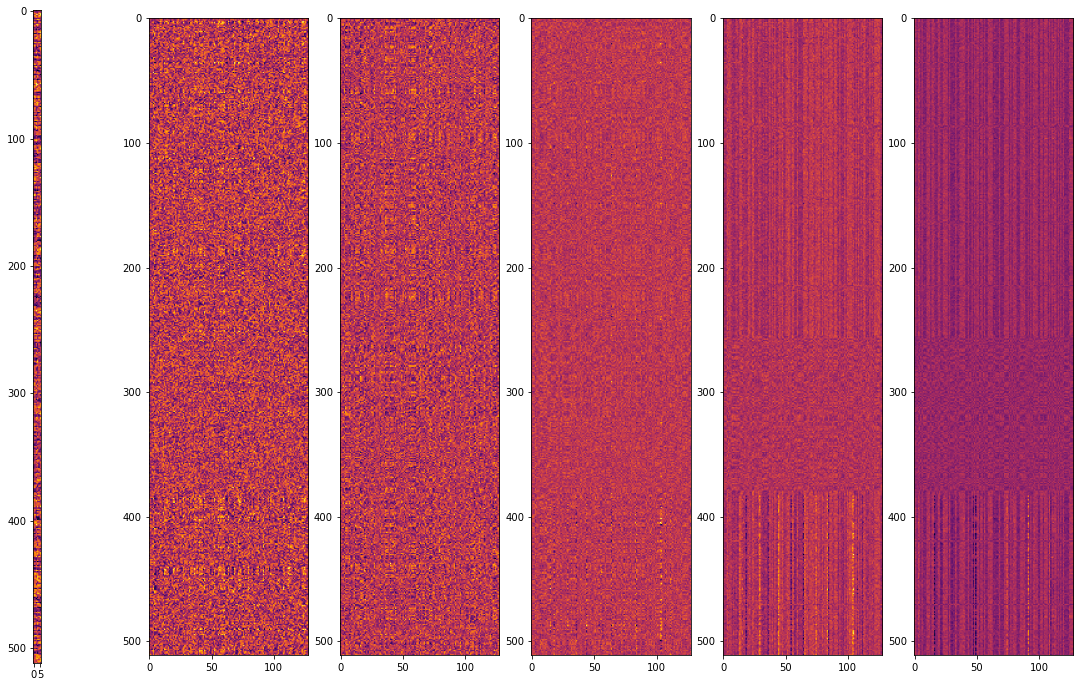

In [466]:
import matplotlib.pyplot as plt
import cv2

# norm_img=cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# plt.imshow(img, cmap='gray')
fig, ax = plt.subplots(1,6,figsize=(20,12))
ax[0].imshow(model.lstm.weight_ih_l0.cpu().detach().numpy(), cmap='inferno')
ax[1].imshow(model.lstm.weight_hh_l0.cpu().detach().numpy(), cmap='inferno')
ax[2].imshow(model.lstm.weight_ih_l1.cpu().detach().numpy(), cmap='inferno')
ax[3].imshow(model.lstm.weight_hh_l1.cpu().detach().numpy(), cmap='inferno')
ax[4].imshow(model.lstm.weight_ih_l2.cpu().detach().numpy(), cmap='inferno')
ax[5].imshow(model.lstm.weight_hh_l2.cpu().detach().numpy(), cmap='inferno')

# ih_l0 - has dimension 6 x 512

# fig.tight_layout()